In [19]:
#晶格常数
a = 10.851
#总面积
Sarea = 10.851*10.851
#z轴范围限定
z_min_threshold = 0.1036
z_max_threshold = 0.1327

center_atom = 0
dr = 0.01
max_radius = 1.0

In [20]:
def vertical_coordinate_difference(atom1, atom2):
    """计算两个三维原子的纵坐标差的绝对值"""
    delta_z = abs(atom1[2] - atom2[2])
    return delta_z

# 示例用法
atom1 = [1.0, 2.0, 3.0]
atom2 = [1.0, 5.0, 1.0]

difference = vertical_coordinate_difference(atom1, atom2)
print("两个原子的纵坐标差的绝对值：", difference)

两个原子的纵坐标差的绝对值： 2.0


In [21]:
#解析XDATCAR

def read_xdatcar(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 提取晶格矢量
    lattice_vectors = [list(map(float, line.split())) for line in lines[2:5]]

    # 提取元素符号和原子数目
    elements = lines[5].split()
    num_atoms = list(map(int, lines[6].split()))

    # 提取原子坐标和总帧数
    atomic_coordinates = []
    start_line = 8  # XDATCAR 文件中原子坐标开始的行数
    frames = 0
    while start_line < len(lines):
        frames += 1
        coordinates = [list(map(float, line.split())) for line in lines[start_line:start_line + sum(num_atoms)]]
        atomic_coordinates.append(coordinates)
        start_line += sum(num_atoms) + 1  # 跳过下一帧的开头行

    return lattice_vectors, elements, num_atoms, atomic_coordinates, frames

# 示例用法
xdatcar_file_path = './XDATCAR'
lattice_vectors, elements, num_atoms, atomic_coordinates, total_frames = read_xdatcar(xdatcar_file_path)

# 打印示例结果
print("晶格矢量：", lattice_vectors)
print("元素符号：", elements)
print("每个元素的原子数目：", num_atoms)
print("总帧数：", total_frames)
# print("每一帧的原子坐标：", atomic_coordinates)


晶格矢量： [[10.851, 0.0, 0.0], [0.0, 10.851, 0.0], [0.0, 0.0, 55.0]]
元素符号： ['Co', 'Al']
每个元素的原子数目： [108, 164]
总帧数： 2500


In [22]:
def filter_coordinates_by_z(coordinates, z_min, z_max):
    """保留z轴坐标在阈值范围内的原子"""
    filtered_coordinates = []

    for frame in coordinates:
        filtered_frame = [atom for atom in frame if z_min <= atom[2] <= z_max]
        filtered_coordinates.append(filtered_frame)

    return filtered_coordinates

atomic_coordinates = filter_coordinates_by_z(atomic_coordinates, z_min_threshold, z_max_threshold)

# 打印示例结果
print("原始原子坐标：", atomic_coordinates[0])
print("过滤后的原子坐标：", atomic_coordinates[0])

原始原子坐标： [[0.28691805, 0.06947627, 0.11750044], [0.45406372, 0.23734263, 0.11875604], [0.62005686, 0.0685945, 0.11912338], [0.78121057, 0.24215361, 0.11936453], [0.94119816, 0.06030864, 0.11646682], [1.12012545, 0.24868806, 0.11674704], [0.28000115, 0.38619387, 0.11930967], [0.41684312, 0.55920905, 0.11800705], [0.63012561, 0.39453915, 0.11660469], [0.78427997, 0.56771483, 0.11477577], [0.93853307, 0.40069157, 0.11580222], [1.12012115, 0.55205405, 0.12142776], [0.28822241, 0.75631429, 0.12029467], [0.46110674, 0.9316272, 0.12224116], [0.64763115, 0.74050073, 0.11196714], [0.80216234, 0.88699154, 0.11546252], [0.96967252, 0.73291645, 0.1196152], [1.12034525, 0.8957219, 0.11739136]]
过滤后的原子坐标： [[0.28691805, 0.06947627, 0.11750044], [0.45406372, 0.23734263, 0.11875604], [0.62005686, 0.0685945, 0.11912338], [0.78121057, 0.24215361, 0.11936453], [0.94119816, 0.06030864, 0.11646682], [1.12012545, 0.24868806, 0.11674704], [0.28000115, 0.38619387, 0.11930967], [0.41684312, 0.55920905, 0.11800705

In [23]:
#只保留atomic_coordinates中每个原子的前两个坐标，并且如果坐标是负数则加1，如果大于1则减1
def process_coordinates(atomic_coordinates):
    processed_coordinates = []

    for frame in atomic_coordinates:
        #processed_frame = [[(coord + 1) if coord < 0 else (coord - 1) if coord > 1 else coord for coord in atom[:2]] + [atom[2]] for atom in frame]
        processed_frame = [[(coord + 1) % 1 if coord < 0 else coord % 1 if coord > 1 else coord for coord in atom[:2]] + [atom[2]] for atom in frame]

        processed_coordinates.append(processed_frame)

    return processed_coordinates

# 示例用法
processed_atomic_coordinates = process_coordinates(atomic_coordinates)

# 打印示例结果
print("原始原子坐标：", atomic_coordinates[0])
print("处理后的原子坐标：", processed_atomic_coordinates[0])


原始原子坐标： [[0.28691805, 0.06947627, 0.11750044], [0.45406372, 0.23734263, 0.11875604], [0.62005686, 0.0685945, 0.11912338], [0.78121057, 0.24215361, 0.11936453], [0.94119816, 0.06030864, 0.11646682], [1.12012545, 0.24868806, 0.11674704], [0.28000115, 0.38619387, 0.11930967], [0.41684312, 0.55920905, 0.11800705], [0.63012561, 0.39453915, 0.11660469], [0.78427997, 0.56771483, 0.11477577], [0.93853307, 0.40069157, 0.11580222], [1.12012115, 0.55205405, 0.12142776], [0.28822241, 0.75631429, 0.12029467], [0.46110674, 0.9316272, 0.12224116], [0.64763115, 0.74050073, 0.11196714], [0.80216234, 0.88699154, 0.11546252], [0.96967252, 0.73291645, 0.1196152], [1.12034525, 0.8957219, 0.11739136]]
处理后的原子坐标： [[0.28691805, 0.06947627, 0.11750044], [0.45406372, 0.23734263, 0.11875604], [0.62005686, 0.0685945, 0.11912338], [0.78121057, 0.24215361, 0.11936453], [0.94119816, 0.06030864, 0.11646682], [0.12012544999999997, 0.24868806, 0.11674704], [0.28000115, 0.38619387, 0.11930967], [0.41684312, 0.55920905, 0

In [13]:
1.8 % 1

0.8

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def distance(p1, p2):
    """计算两点之间的距离"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def radial_distribution_function(coordinates, center_atom, dr, max_radius):
    #avg_density = N总/S总
    avg_density = len(coordinates)/Sarea
    """计算二维坐标系中的径向分布函数"""
    center = coordinates[center_atom]  # 指定原子的坐标
    distances = []

    for i, atom in enumerate(coordinates):
        if i != center_atom:
            dist = distance(center, atom)
            distances.append(dist)

    bins = np.arange(0, max_radius + dr, dr)
    #落在圆环上的点的个数
    rdf_num, _ = np.histogram(distances, bins=bins)
    # print("每一圈的原子个数：" )
    # print(rdf_num)
    #每个圆环的面积
    #print(bins[1:])
    areas = 2 * np.pi * bins[1:] * dr*a
    # print("每一圈的面积：" )
    # print(areas)
    #print(areas)
    # 计算每个圆环上点的个数与面积之比
    rdf_ratio = rdf_num / areas
    #比平均密度
    rdf_dr = rdf_ratio/avg_density
    return bins, rdf_dr

# 示例用法
# 假设 processed_atomic_coordinates 是一个包含所有原子坐标的数组
# center_atom 是指定原子的索引
# dr 是半径步长，max_radius 是最大半径


bins, rdf_dr = radial_distribution_function(processed_atomic_coordinates[5], center_atom, dr, max_radius)
print(rdf_dr)



[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         39.97662703
 38.37756194  0.          0.          0.          0.          0.
  0.         29.98247027  0.         28.21879555  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         19.98831351
  0.          0.         37.62506073  0.          0.         17.76738979
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         14.53695528
  0.          0.         13.90491375  0.         13.51322604  0.
  0.         12.96539255  0.         12.62419801  0.          0.
  0.          0.          0.          0.          0.          0.
 11.28751822  0.          0.         10.90271646  0.      

In [57]:
avg_density = len(processed_atomic_coordinates[2])/Sarea
rdf_ratio[0]/avg_density

2.3100925369564482

In [25]:
#一帧中所有原子为中心的rdf的平均
def calculate_all_rdfs(processed_atomic_coordinate):
    all_rdfs = []
    #以一帧的每一个原子为中心
    for center_atom in range(len(processed_atomic_coordinate)):
        bins, rdf_dr = radial_distribution_function(
            processed_atomic_coordinate,
            center_atom,
            dr,
            max_radius,
        )
        all_rdfs.append(rdf_dr)

    return np.mean(all_rdfs, axis=0)
calculate_all_rdfs(processed_atomic_coordinates[0])


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 19.38260704, 27.8098275 , 31.09293213, 17.0566942 ,
        0.        , 11.84492653,  0.        ,  0.        ,  7.10695592,
        6.87769927,  6.66277117, 19.38260704,  9.40626518, 15.22919125,
        5.92246326,  2.88119834,  5.61075467,  0.        ,  0.        ,
        0.        ,  0.        ,  2.47917067,  0.        ,  4.73797061,
        4.63497125,  6.80453226,  4.44184745,  4.3511975 ,  2.13208677,
        6.27084345, 12.30050062, 10.05701309, 21.71569863,  7.75304282,
        0.        ,  3.74050311,  3.67601168,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.2801335 ,
        3.23043451,  3.18221907,  3.13542173,  4.63497125,  3.04

In [26]:
#所有帧中所有原子为中心的rdf的平均
all_rdfs = []
for processed_atomic_coordinate in processed_atomic_coordinates:
        rdf_dr = calculate_all_rdfs(processed_atomic_coordinate)
        all_rdfs.append(rdf_dr)

rdf_all = np.mean(all_rdfs, axis=0)
rdf_all

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34658112e-02, 2.72907107e-01,
       2.49758736e+00, 1.27401876e+01, 2.64082122e+01, 3.01548139e+01,
       2.18530366e+01, 1.15247491e+01, 4.20257993e+00, 1.19396859e+00,
       2.58791222e-01, 1.27783067e+00, 3.99044112e+00, 9.30122855e+00,
       1.67194368e+01, 1.96691276e+01, 1.48697823e+01, 6.60710002e+00,
       2.26116446e+00, 5.39754599e-01, 1.64006675e-01, 3.73115186e-02,
       0.00000000e+00, 9.13751475e-03, 1.01150163e-01, 8.24729930e-01,
       2.42394576e+00, 5.46463110e+00, 8.00757356e+00, 8.92455989e+00,
       6.68430960e+00, 5.14941598e+00, 6.74575533e+00, 1.10597901e+01,
       1.51506891e+01, 1.33887153e+01, 7.75691934e+00, 3.13340610e+00,
      

In [27]:
rdf_all

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34658112e-02, 2.72907107e-01,
       2.49758736e+00, 1.27401876e+01, 2.64082122e+01, 3.01548139e+01,
       2.18530366e+01, 1.15247491e+01, 4.20257993e+00, 1.19396859e+00,
       2.58791222e-01, 1.27783067e+00, 3.99044112e+00, 9.30122855e+00,
       1.67194368e+01, 1.96691276e+01, 1.48697823e+01, 6.60710002e+00,
       2.26116446e+00, 5.39754599e-01, 1.64006675e-01, 3.73115186e-02,
       0.00000000e+00, 9.13751475e-03, 1.01150163e-01, 8.24729930e-01,
       2.42394576e+00, 5.46463110e+00, 8.00757356e+00, 8.92455989e+00,
       6.68430960e+00, 5.14941598e+00, 6.74575533e+00, 1.10597901e+01,
       1.51506891e+01, 1.33887153e+01, 7.75691934e+00, 3.13340610e+00,
      

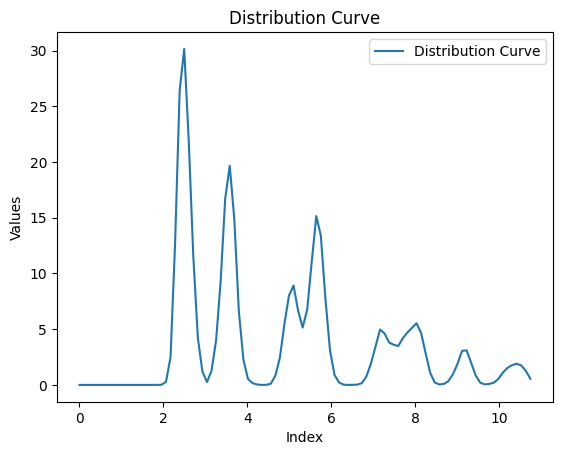

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 提供的数据

# 生成与数据长度相同的 x 坐标
#x = np.arange(len(rdf_all))
x = np.arange(0, len(rdf_all) * dr * a , dr*a)

# 绘制分布曲线
plt.plot(x, rdf_all, label="Distribution Curve")

# 添加标签和标题
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Distribution Curve")

# 显示图例
plt.legend()

# 显示图形
plt.show()